In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### 1. Data Loading:

#### a. Load the dataset “prisoners.csv” using pandas and display the first and last five rows in the dataset.

In [2]:
# Reading the Data file and displaying first 5 rows.
df = pd.read_csv('prisoners.csv')
df.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


In [3]:
# displaying last 5 rows.
df.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   STATE/UT                                           35 non-null     object
 1   YEAR                                               35 non-null     int64 
 2   No. of Inmates benefitted by Elementary Education  35 non-null     int64 
 3   No. of Inmates benefitted by Adult Education       35 non-null     int64 
 4   No. of Inmates benefitted by Higher Education      35 non-null     int64 
 5   No. of Inmates benefitted by Computer Course       35 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


#### b. Use describe method in pandas and find out the number of columns. Can you say something about those rows who have zero inmates?

In [5]:
print(df.describe())

         YEAR  No. of Inmates benefitted by Elementary Education  \
count    35.0                                          35.000000   
mean   2013.0                                        1057.914286   
std       0.0                                        2078.196777   
min    2013.0                                           0.000000   
25%    2013.0                                           0.000000   
50%    2013.0                                         167.000000   
75%    2013.0                                        1294.500000   
max    2013.0                                        9480.000000   

       No. of Inmates benefitted by Adult Education  \
count                                     35.000000   
mean                                    1534.857143   
std                                     3022.110503   
min                                        0.000000   
25%                                        6.500000   
50%                                      237.000000   
75

### 2. Data Manipulation:

#### a. Create a new column -’total_benefitted’ that is a sum of inmates benefitted through all modes.

In [6]:
df['total_benefitted'] = df['No. of Inmates benefitted by Elementary Education'] + df['No. of Inmates benefitted by Adult Education'] + df['No. of Inmates benefitted by Higher Education'] + df['No. of Inmates benefitted by Computer Course']
df.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
0,Andhra Pradesh,2013,9480,13758,672,170,24080
1,Arunachal Pradesh,2013,0,0,0,0,0
2,Assam,2013,676,750,14,30,1470
3,Bihar,2013,1693,3013,125,1417,6248
4,Chhatisgarh,2013,1664,1803,192,103,3762


#### b. Create a new row - “totals” that is the sum of all inmates benefitted through each mode across all states.

In [7]:
df = df.append(df.sum(), ignore_index = True)
df.at[35, "STATE/UT"] = "totals"
print(df.head())

            STATE/UT  YEAR  No. of Inmates benefitted by Elementary Education  \
0     Andhra Pradesh  2013                                               9480   
1  Arunachal Pradesh  2013                                                  0   
2              Assam  2013                                                676   
3              Bihar  2013                                               1693   
4        Chhatisgarh  2013                                               1664   

   No. of Inmates benefitted by Adult Education  \
0                                         13758   
1                                             0   
2                                           750   
3                                          3013   
4                                          1803   

   No. of Inmates benefitted by Higher Education  \
0                                            672   
1                                              0   
2                                             14  

### 3. Plotting:

#### a. Make a bar plot with each state name on the x -axis and their total benefitted inmates as their bar heights. Which state has the maximum number of beneficiaries?

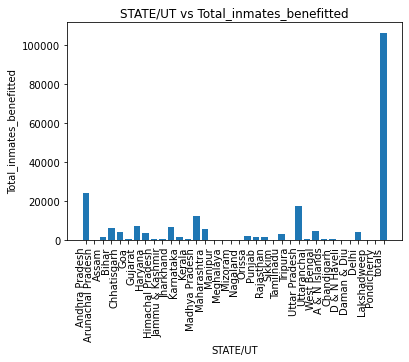

In [8]:
x = df['STATE/UT']
y = df['total_benefitted']
plt.bar(x,y)
plt.setp(plt.gca().get_xticklabels(), rotation=90,horizontalalignment='right') 
plt.title("STATE/UT vs Total_inmates_benefitted")
plt.xlabel("STATE/UT")
plt.ylabel("Total_inmates_benefitted")
plt.show()

#### Arunachal Pradesh has the maximum number of beneficiaries.

####  b. Make a pie chart that depicts the ratio among different modes of benefits.

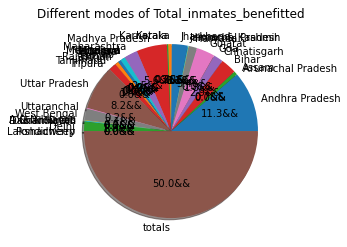

In [9]:
labels = df['STATE/UT']
values = df['total_benefitted']
plt.pie(values, labels = labels, autopct = '%1.1f&&', shadow = True) 
plt.title("Different modes of Total_inmates_benefitted")
plt.show()